<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/lab09_prophet_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#인자만들기

In [2]:
pd.date_range('2020-01-05',periods=365)

DatetimeIndex(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14',
               ...
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
               '2021-01-02', '2021-01-03'],
              dtype='datetime64[ns]', length=365, freq='D')

In [3]:
date=pd.date_range('2020-01-05',periods=365)

In [5]:
len(date)

365

In [18]:
trend=np.log(np.arange(1,101,100/365))*22
len(trend)

365

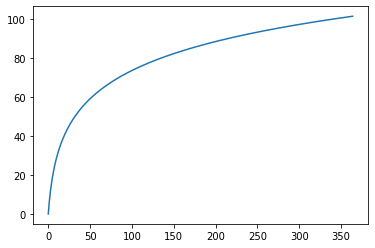

In [19]:
plt.plot(trend)

In [27]:
noise=np.random.randn(365)*5

In [28]:
len(noise)

365

In [32]:
week=np.array([10,1,2,2,5,10,8])

In [38]:
weekly=np.tile(week,53)
weekly=weekly[:365]
len(weekly)

365

In [45]:
month=np.sin(np.arange(0,2*np.pi,2*np.pi/30))*10+10
len(month)

30

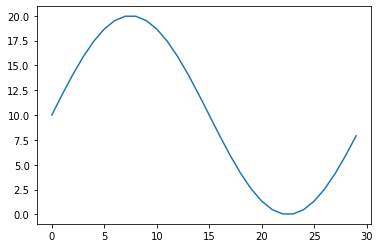

In [46]:
plt.plot(month)


In [50]:
monthly=np.tile(month,13)
monthly=monthly[:365]
len(monthly)

365

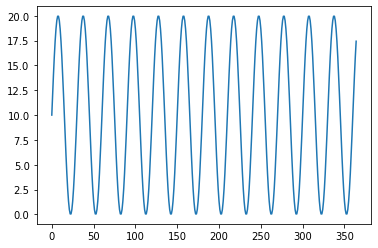

In [51]:
plt.plot(monthly)

In [56]:
reg=np.sin(np.arange(0,np.pi,np.pi/365))*30
len(reg)

365

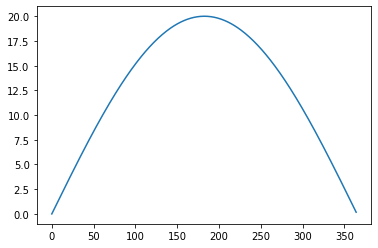

In [55]:
plt.plot(reg)

#모델 생성

In [58]:
target=trend+weekly+monthly+noise+reg

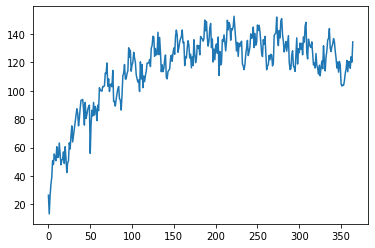

In [59]:
plt.plot(target)

In [60]:
data=pd.DataFrame() #데이터 프레임 정의, 아직 아무것도 안들어 있음

In [61]:
data['date']=date
data['target']=target
data['trend']=trend
data['reg']=reg
data.head()

,date,target,trend,reg
0,2020-01-05,26.450227,0.000000,0.000000
1,2020-01-06,13.258281,5.327081,0.258210
2,2020-01-07,26.202349,9.612424,0.516401
3,2020-01-08,33.993499,13.197573,0.774553
4,2020-01-09,39.051252,16.279527,1.032648


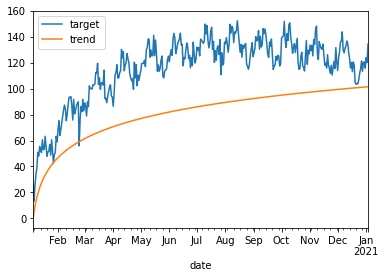

In [62]:
fig,ax=plt.subplots()
data.plot(x='date',y='target',ax=ax)
data.plot(x='date',y='trend',ax=ax)

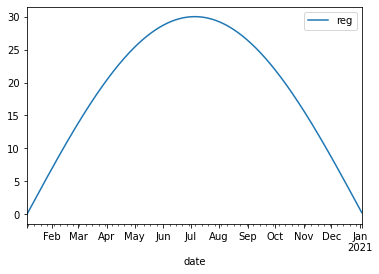

In [63]:
data.plot(x='date',y='reg')

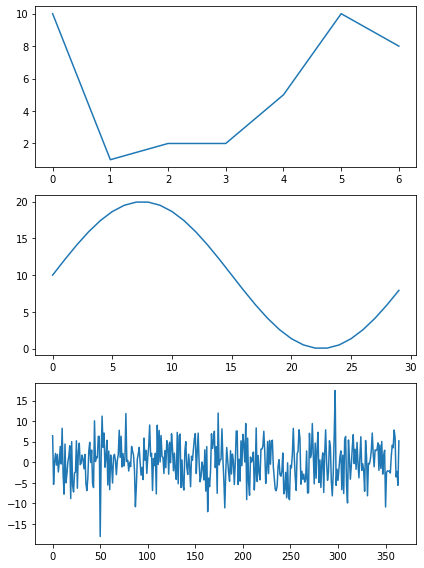

In [68]:
fig,ax=plt.subplots(nrows=3,figsize=(6,8))
ax[0].plot(week)
ax[1].plot(month)
ax[2].plot(noise)
plt.tight_layout()

#예측 모델

In [69]:
from fbprophet import Prophet

In [71]:
data_train=data[['date','target']].rename(columns={'date':'ds','target':'y'})
data_train.head()

,ds,y
0,2020-01-05,26.450227
1,2020-01-06,13.258281
2,2020-01-07,26.202349
3,2020-01-08,33.993499
4,2020-01-09,39.051252


##모델 1

In [72]:
model1=Prophet()

In [73]:
model1.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
results1=model1.predict()

In [75]:
model1.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

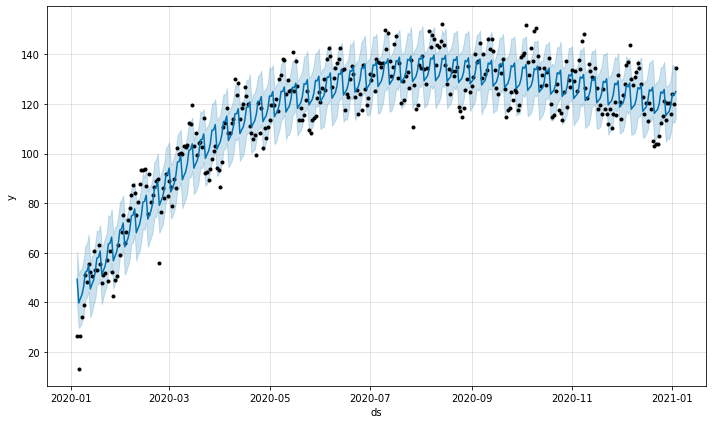

In [76]:
model1.plot(results1)
plt.show()

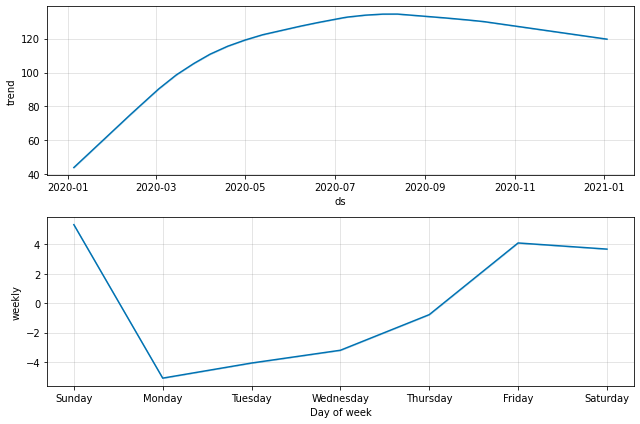

In [78]:
model1.plot_components(results1)
plt.show()

In [79]:
future=model1.make_future_dataframe(periods=365)

In [80]:
future.head()

,ds
0,2020-01-05
1,2020-01-06
2,2020-01-07
3,2020-01-08
4,2020-01-09


In [81]:
future.tail()

,ds
725,2021-12-30
726,2021-12-31
727,2022-01-01
728,2022-01-02
729,2022-01-03


In [82]:
forcast1=model1.predict(future)

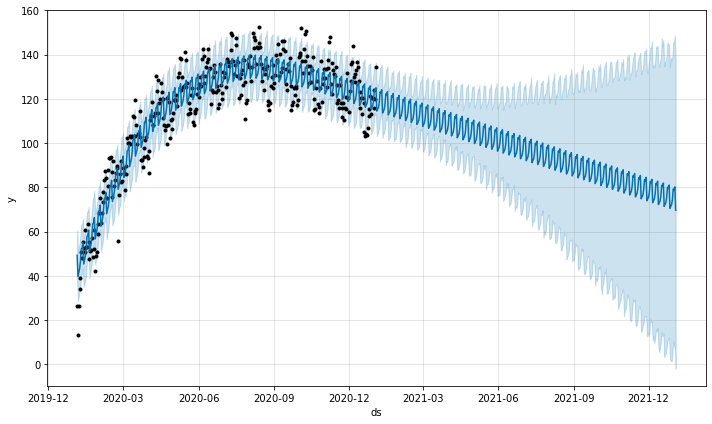

In [83]:
model1.plot(forcast1)
plt.show()

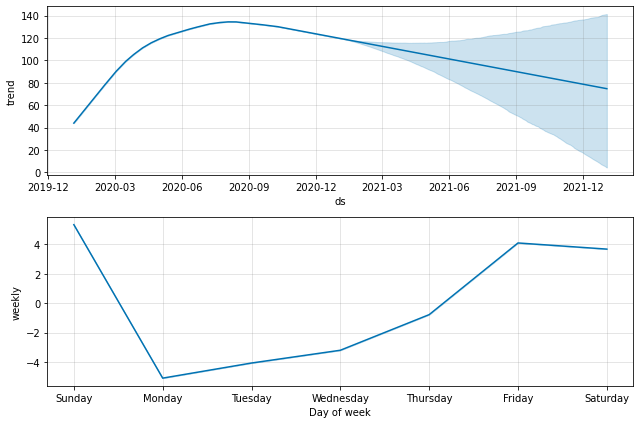

In [84]:
model1.plot_components(forcast1)
plt.show()

##모델 2

In [105]:
model2=Prophet()
model2.add_seasonality(name='monthly',period=30,fourier_order=3)

In [106]:
model2.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [107]:
model2.seasonalities

OrderedDict([('monthly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 30,
               'prior_scale': 10.0}),
             ('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [108]:
results2=model2.predict()

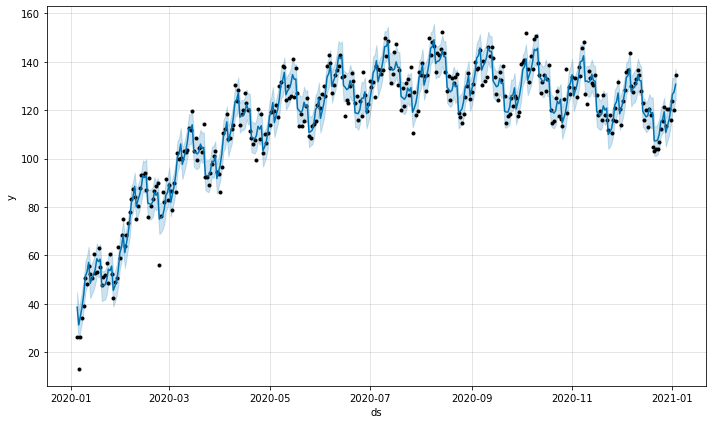

In [109]:
model2.plot(results2)
plt.show()

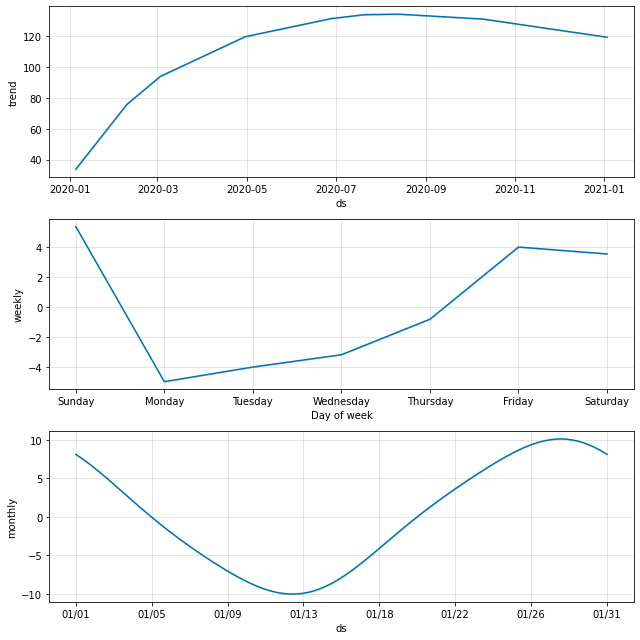

In [110]:
model2.plot_components(results2)
plt.show()

In [111]:
forcast2=model2.predict(future)

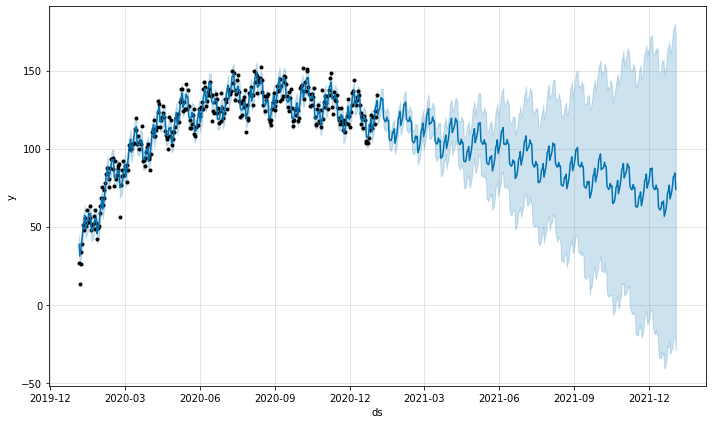

In [112]:
model2.plot(forcast2)
plt.show()

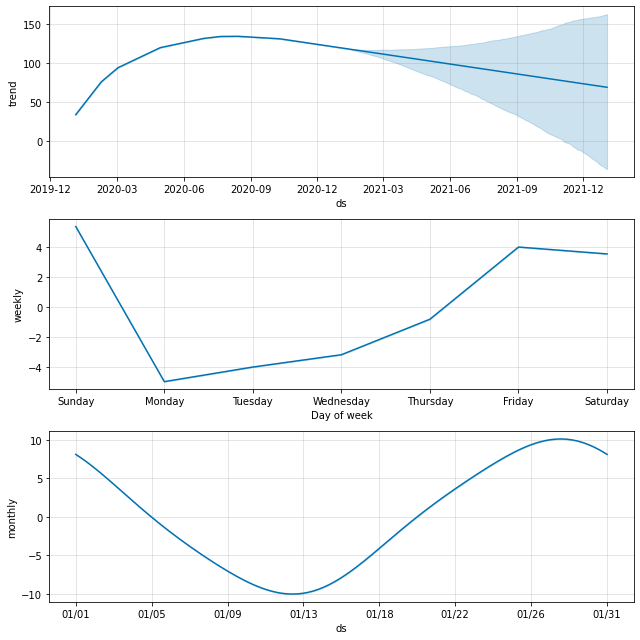

In [113]:
model2.plot_components(forcast2)
plt.show()

In [114]:
data_train

,ds,y
0,2020-01-05,26.450227
1,2020-01-06,13.258281
2,2020-01-07,26.202349
3,2020-01-08,33.993499
4,2020-01-09,39.051252
...,...,...
360,2020-12-30,120.550937
361,2020-12-31,115.828335
362,2021-01-01,123.934451
363,2021-01-02,120.181193


In [115]:
data_train['reg']=data['reg']
data_train.head()

,ds,y,reg
0,2020-01-05,26.450227,0.000000
1,2020-01-06,13.258281,0.258210
2,2020-01-07,26.202349,0.516401
3,2020-01-08,33.993499,0.774553
4,2020-01-09,39.051252,1.032648


##모델3

In [116]:
model3=Prophet()

In [118]:
model3.add_seasonality(name='monthly',period=30,fourier_order=3)
model3.add_regressor(name='reg')

In [120]:
model3.fit(data_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
results3=model3.predict()

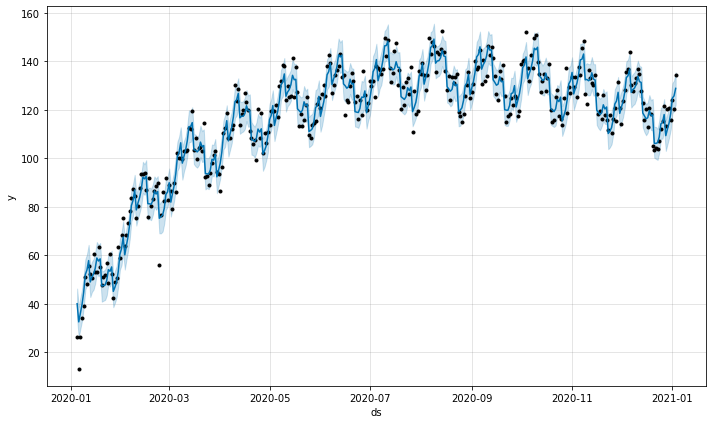

In [123]:
model3.plot(results3)
plt.show()

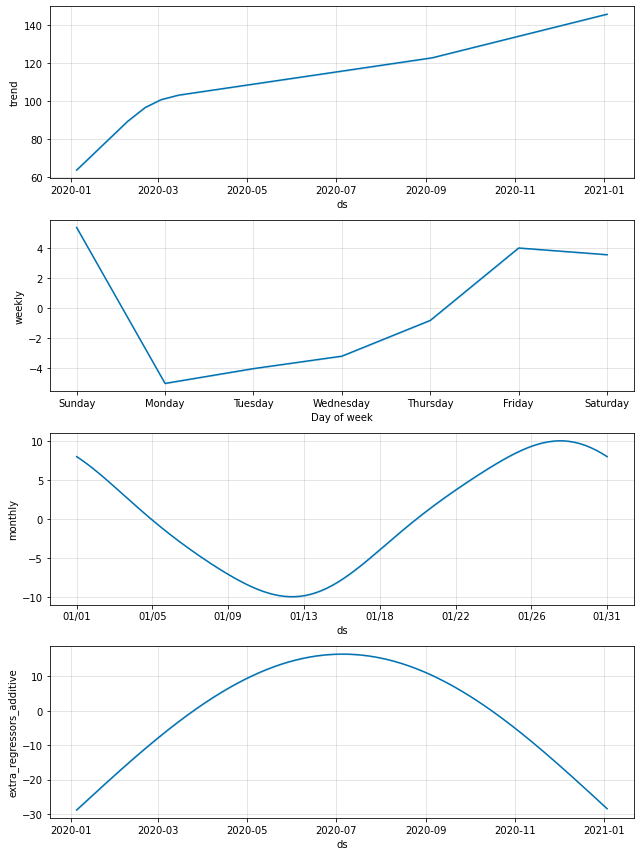

In [125]:
model3.plot_components(results3)
plt.show()

In [126]:
future

,ds
0,2020-01-05
1,2020-01-06
2,2020-01-07
3,2020-01-08
4,2020-01-09
...,...
725,2021-12-30
726,2021-12-31
727,2022-01-01
728,2022-01-02


In [128]:
future['reg']=pd.concat([data['reg'],data['reg']],axis=0,ignore_index=True)

In [129]:
future.head()

,ds,reg
0,2020-01-05,0.000000
1,2020-01-06,0.258210
2,2020-01-07,0.516401
3,2020-01-08,0.774553
4,2020-01-09,1.032648


In [130]:
forcast3=model3.predict(future)

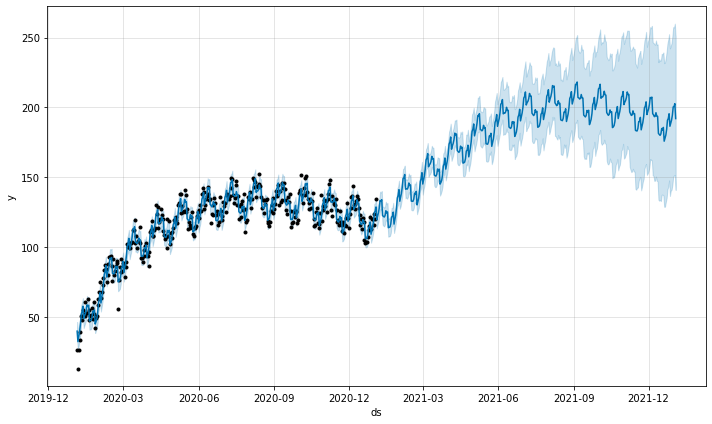

In [132]:
model3.plot(forcast3)
plt.show()

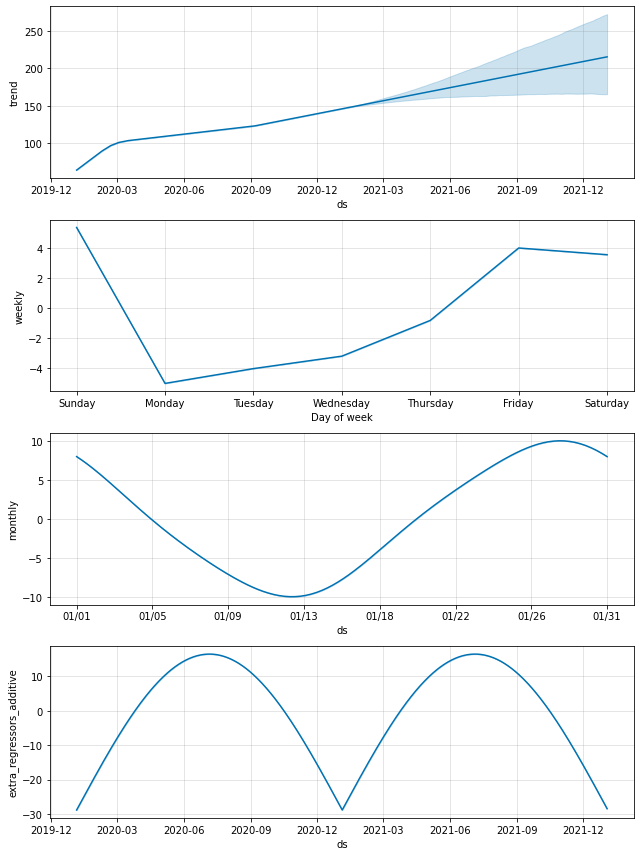

In [133]:
model3.plot_components(forcast3)
plt.show()